
# Exploring the Dynamics of Online Learning: Insights from Coursera Courses Data

## Project

Online learning platforms like Coursera have revolutionized the education landscape, offering diverse courses catering to various interests, skill levels, and professional goals. This dataset provides a rich source of information about courses, their providers, difficulty levels, certifications, and popularity metrics like ratings and enrollment. By conducting an Exploratory Data Analysis (EDA) on this dataset, we aim to uncover trends and patterns that can help new learners make informed decisions about their educational journey.


## Goal
The goal of this project is to analyze and interpret the Coursera courses dataset to provide actionable insights about the availability, quality, and accessibility of online courses.

### First, let's start by importing the necessary libraries and the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

In [2]:
data = pd.read_csv('coursea_data.csv', index_col=0)
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
data = data.rename(columns={'course_title':'title', 'course_organization':'organization', 'course_Certificate_type':'certificate_type',
       'course_rating':'rating', 'course_difficulty':'difficulty', 'course_students_enrolled':'students_enrolled'})

In [4]:
data.shape

(891, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              891 non-null    object 
 1   organization       891 non-null    object 
 2   certificate_type   891 non-null    object 
 3   rating             891 non-null    float64
 4   difficulty         891 non-null    object 
 5   students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [6]:
data.isnull().sum()

title                0
organization         0
certificate_type     0
rating               0
difficulty           0
students_enrolled    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['title', 'organization', 'certificate_type', 'rating', 'difficulty',
       'students_enrolled'],
      dtype='object')

In [9]:

organizarions = data.organization.unique().tolist()
organizarions

['(ISC)²',
 'University of Pennsylvania',
 'Johns Hopkins University',
 'Yale University',
 'Indian School of Business',
 'University at Buffalo',
 'deeplearning.ai',
 'IBM',
 'Amazon Web Services',
 'University of Toronto',
 'University of California, Irvine',
 'University of Illinois at Urbana-Champaign',
 'University of Michigan',
 'Universidad Nacional Autónoma de México',
 'University of Colorado Boulder',
 'National Research University Higher School of Economics',
 'Google Cloud',
 'Erasmus University Rotterdam',
 'Duke University',
 'University of Virginia',
 'Atlassian',
 'ScrumTrek',
 'University of California San Diego',
 'Stanford University',
 'University of Colorado System',
 'Copenhagen Business School',
 'Macquarie University',
 'Vanderbilt University',
 'The University of Edinburgh',
 'Technical University of Denmark (DTU)',
 'Universidad Austral',
 'Arizona State University',
 'The Museum of Modern Art',
 'National Arts Strategies',
 'Università Bocconi',
 'Pontificia 

In [10]:
data.organization.value_counts()

organization
University of Pennsylvania                     59
University of Michigan                         41
Google Cloud                                   34
Johns Hopkins University                       28
Duke University                                28
                                               ..
Nanyang Technological University, Singapore     1
ScrumTrek                                       1
JetBrains                                       1
Tsinghua University                             1
Mail.Ru Group                                   1
Name: count, Length: 154, dtype: int64

In [11]:
data.certificate_type.value_counts()

certificate_type
COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: count, dtype: int64

In [12]:
data.difficulty.value_counts()

difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64

From the our little inspection we can see that this data has no missing values or duplicates. We also notice the following:
- There are 154 unique organizations serving as course providers in the dataset with `University of Pennsylvania`, `University of Michigan`, and `Google Cloud` being the top 3 organization respectively.

- There are three certificate types `COURSE`, `SPECIALIZATION`, and `PROFESSIONAL CERTIFICATE`

- There are 4 difficulty level, with the `Beginner` courses taking  over 50% of the entire dataset.
***
### Data Cleaning
We need to clean the `course_students_enrolled`column. It is supposed to be an integer column but it is viewed as an object column by pandas because the values are recorded in k, as in `25k` and `2.3k` for `25000` and `2500` respectfully. To handle that, we create a function to clean the 'course_students_enrolled' column, by remove 'k', convert to float, and multiply by 1,000.


In [13]:
def clean_students_enrolled(value):
    if 'k' in value:
        return int(float(value.replace('k', '')) * 1000)
    elif 'm' in value:
        return int(float(value.replace('m', '')) * 1000000)
    else:
        return int(value) 

data['students_enrolled'] = data['students_enrolled'].apply(clean_students_enrolled)

data['students_enrolled'] = data['students_enrolled'].astype('int64')
data.head()

# abbrev_num= {k: 1000, m: 1000000} 
# data[students_enrolled]= data[students_enrolled].apply( lambda x: int(float(x[:-1])* abbrev_num.get(x[-1], 1)))

,title,organization,certificate_type,rating,difficulty,students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


In [14]:
data['students_enrolled'].dtype

dtype('int64')

With that problem out of the way, let's get a summary statistic of the numerical columns in the data

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              891 non-null    object 
 1   organization       891 non-null    object 
 2   certificate_type   891 non-null    object 
 3   rating             891 non-null    float64
 4   difficulty         891 non-null    object 
 5   students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 48.7+ KB


In [16]:
data.describe()

,rating,students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


#### The summary statistics reveal key insights into the numerical columns of the dataset. 
- Both columns have a count of 891 data points, further confirming that there are no missing values in these columns.

- `course_rating` shows an average rating of 4.68 (mean), with a standard deviation of 0.16, indicating that most ratings are clustered around the mean and relatively high. 

- Ratings range from a minimum of 3.3 to a perfect 5.0, with 50% of courses scoring 4.7 or higher. 

- The `course_students_enrolled` column exhibits greater variability, with an average enrollment of 90,552 students and a standard deviation of 181,936. 

- Enrollment numbers range from 1,500 to a staggering 3,200,000, showing a wide disparity in course popularity. The median enrollment is 42,000, indicating that while a few courses attract very large audiences, most enrollments are lower, with 75% of courses having fewer than 99,500 students.

***
### Next, let's check for outliers

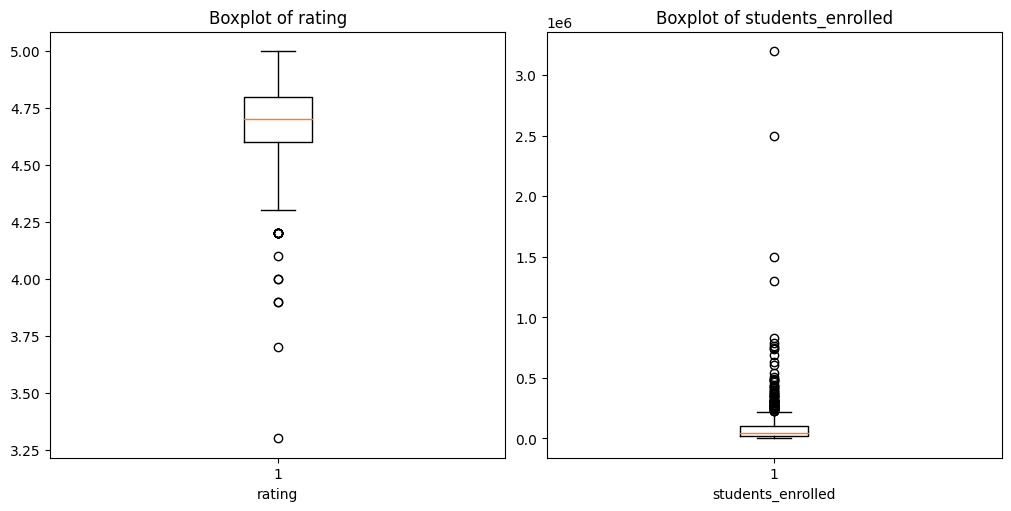

In [17]:
num_col = data.select_dtypes(include='number')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5 * 2, 5), constrained_layout=True)

axes = axes.flatten()

for i, col in enumerate(num_col):
    axes[i].boxplot(data[col].dropna())
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.show()

As seen in the plots above, the `course_rating` has lower-bound outliers while the `course_students_enrolled` have upper-bound

To handle outliers, I will do nothing, because that in itself is a way to handle outliers and in this case, they are genuine but extreme values as we are dealing with data scrapped from coursera website.
Another reason is, we have just 891 rows of data, can't afford to loose any.
***
## Exploratory Data Analysis (EDA)
With the data inspection and cleaning out of the way, we can move into the EDA proper. The approach we will be taking in this case is asking some questions and answering them with plot.

### 1. Which organizations conduct the most courses, and how does their offering align with learners' preferences?

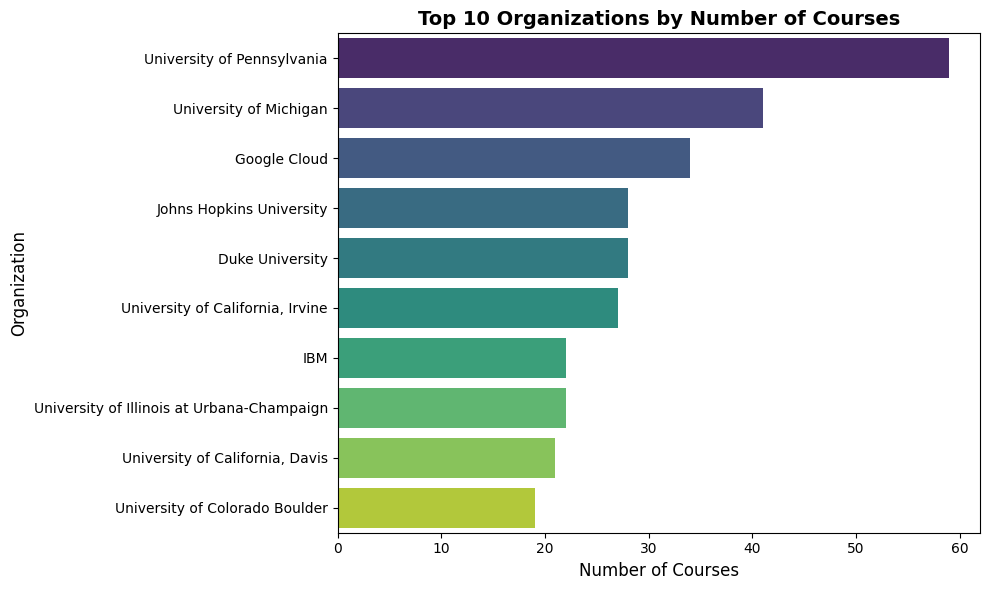

In [18]:
organization_count = data['organization'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=organization_count.values, y=organization_count.index, palette="viridis")
plt.title("Top 10 Organizations by Number of Courses", fontsize=14, fontweight='bold')
plt.xlabel("Number of Courses", fontsize=12)
plt.ylabel("Organization", fontsize=12)
plt.tight_layout()
plt.show()

# Scatter plot of ratings vs enrollments by organization
fig = px.scatter(data, x='rating', y='students_enrolled',
                 color='organization', 
                 size='students_enrolled',
                 title='Course Ratings vs Enrollment by Organization',
                 labels={'rating': 'Rating', 'students_enrolled': 'Enrollments'},
                 hover_data=['title'])
fig.show()

In [20]:
data.groupby('organization')[["students_enrolled", 'rating']].mean().sort_values(by="students_enrolled", ascending=False)[:10]

,students_enrolled,rating
organization,,
Stanford University,303375.000000,4.768750
Yale University,232470.588235,4.817647
McMaster University,230000.000000,4.800000
Google - Spectrum Sharing,210000.000000,4.900000
Ludwig-Maximilians-Universität München (LMU),192500.000000,4.750000
École Polytechnique,190000.000000,4.800000
University of Michigan,181407.317073,4.729268
Georgia Institute of Technology,181300.000000,4.660000
deeplearning.ai,178962.500000,4.743750


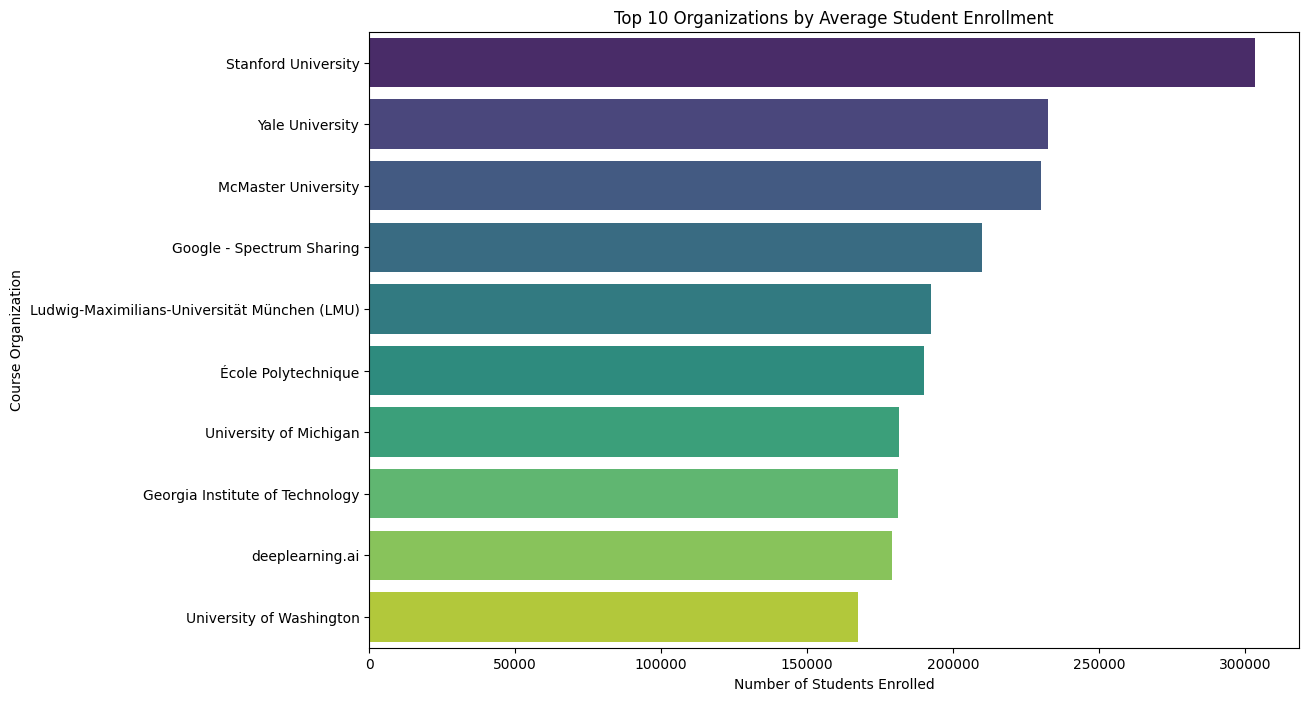

In [21]:
top_enrolled_org = data.groupby('organization')[["students_enrolled", 'rating']].mean().sort_values(by="students_enrolled", ascending=False)[:10]

plt.figure(figsize=(12, 8))

sns.barplot(data=top_enrolled_org, x=top_enrolled_org.students_enrolled, y=top_enrolled_org.index, palette="viridis")
plt.title("Top 10 Organizations by Average Student Enrollment")
plt.xlabel("Number of Students Enrolled")
plt.ylabel("Course Organization")
plt.show()

From the plots above, we can see that the quantity of the courses by the organization does not necessarily drive engagement or enrollment. Rather, we see a positive correlation between `course_rating` and `course_students_enrolled`.
- Higher-rated courses (closer to 5 on the x-axis) tend to have more enrollments, as represented by larger bubble sizes and higher y-axis values.

- There are a few courses with very high enrollments (e.g., over 2 million) regardless of ratings. These outliers likely represent courses with widespread appeal, excellent marketing, or popular topics.

- Standford University, represented by the purple marker, dominate in terms of enrollment. This could reflect their brand value, course popularity, or larger course catalogs.

- Multiple organizations have offerings in the high-rating zone (4.5 and above), but the size of their bubbles (enrollment numbers) varies. This could indicate differences in marketing, reach, or the type of learners they attract.
***
### 2.What are the most common certification types offered, and how do they influence enrollment numbers?

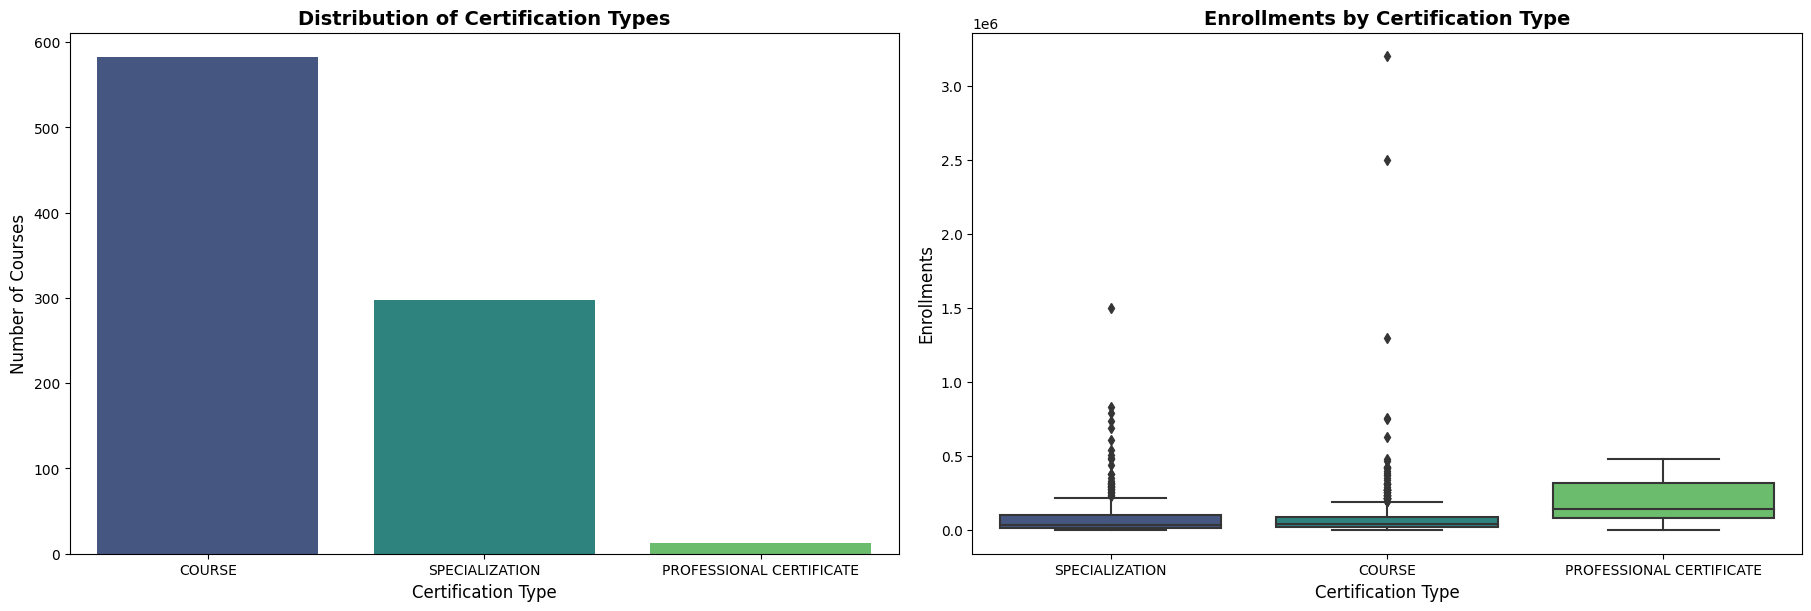

In [22]:
certification_count = data['certificate_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

sns.barplot(x=certification_count.index, y=certification_count.values, palette="viridis", ax=axes[0])
axes[0].set_title("Distribution of Certification Types", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Certification Type", fontsize=12)
axes[0].set_ylabel("Number of Courses", fontsize=12)

sns.boxplot(data=data, x='certificate_type', y='students_enrolled', palette="viridis", ax=axes[1])
axes[1].set_title("Enrollments by Certification Type", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Certification Type", fontsize=12)
axes[1].set_ylabel("Enrollments", fontsize=12)

plt.show()

From the first bar plot, we can see that the `COURSE` category has the hightest number of courses with a little below 600, followed by `SPECIALIZATION` and `PROFESSIONAL CERTIFICATE` havivg the least number of courses. However, we see that this high number of courses does not really influence engagement except in some few exceptional cases.

- Professional Certificate courses tend to have higher enrollments overall, as indicated by the higher median and interquartile range (IQR) compared to the other two certification types. This suggests that Professional Certificate programs are particularly popular, likely due to their perceived career value or comprehensiveness.

- Specialization and Course types have similar enrollment distributions, but their medians are noticeably lower than Professional Certificates. These certification types seem to cater to smaller or more specific audiences.

- Significant outliers are visible particularly in Specialization and Course types, where some courses have exceptionally high enrollments. This may indicate a few extremely popular courses in these categories driving a lot of attention, potentially due to their content, instructors, or topics.

- Despite the outliers, Professional Certificates show a more consistent trend of attracting higher enrollments, while Specialization and Course types appear to attract smaller but still substantial audiences on average.
***
### 3. How does the difficulty level of courses vary across organizations, and which difficulty level attracts the most learners?



In [23]:
def categorize_organization(org_name):
    org_name = org_name.lower() 

    if any(keyword in org_name for keyword in ['university', 'universidad', 'school', 'institute', 'college']):
        return 'Academic'

    elif any(keyword in org_name for keyword in ['ibm', 'amazon', 'google', 'microsoft', 'cloud']):
        return 'Tech Giant'

    else:
        return 'Other'

data['organization_type'] = data['organization'].apply(categorize_organization)

data.sample(10)


,title,organization,certificate_type,rating,difficulty,students_enrolled,organization_type
508,Anatomy: Musculoskeletal and Integumentary Sys...,University of Michigan,COURSE,4.8,Beginner,20000,Academic
287,Greek and Roman Mythology,University of Pennsylvania,COURSE,4.8,Mixed,260000,Academic
185,Vital Signs: Understanding What the Body Is Te...,University of Pennsylvania,COURSE,4.8,Mixed,190000,Academic
808,Preparing for the Google Cloud Associate Cloud...,Google Cloud,COURSE,4.7,Beginner,22000,Tech Giant
800,Cómo hablar bien en público,Universitat Autònoma de Barcelona,COURSE,4.8,Beginner,55000,Other
745,Introduction to Electronics,Georgia Institute of Technology,COURSE,4.7,Mixed,110000,Academic
322,American Contract Law I,Yale University,COURSE,4.9,Beginner,18000,Academic
523,Modernizing Data Lakes and Data Warehouses wit...,Google Cloud,COURSE,4.7,Intermediate,9100,Tech Giant
603,Using Python to Interact with the Operating Sy...,Google,COURSE,4.7,Beginner,19000,Tech Giant
566,Customer Segmentation and Prospecting,Northwestern University,COURSE,4.7,Beginner,18000,Academic


organization_type
Academic      4.7
Other         4.7
Tech Giant    4.6
Name: rating, dtype: float64


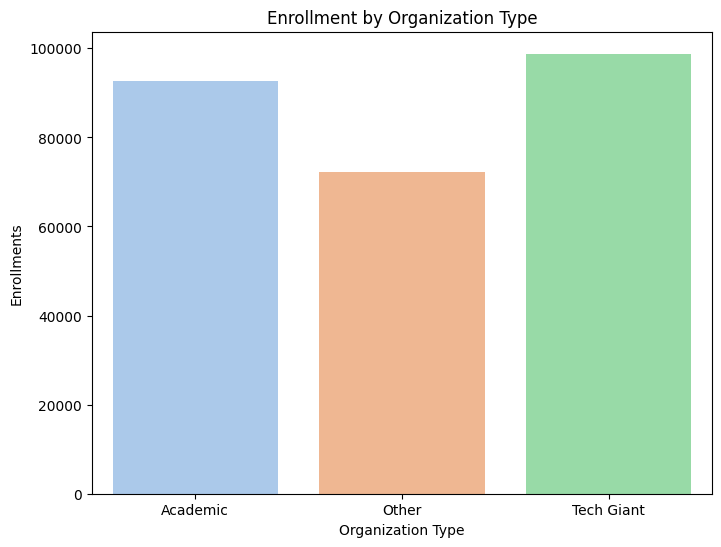

In [24]:

enrollment_by_type = data.groupby('organization_type')['students_enrolled'].mean()
ratings_by_type = data.groupby('organization_type')['rating'].median()

print(ratings_by_type)

plt.figure(figsize=(8, 6))
sns.barplot(x=enrollment_by_type.index, y=enrollment_by_type.values, palette="pastel")
plt.title("Enrollment by Organization Type")
plt.ylabel("Enrollments")
plt.xlabel("Organization Type")
plt.show()


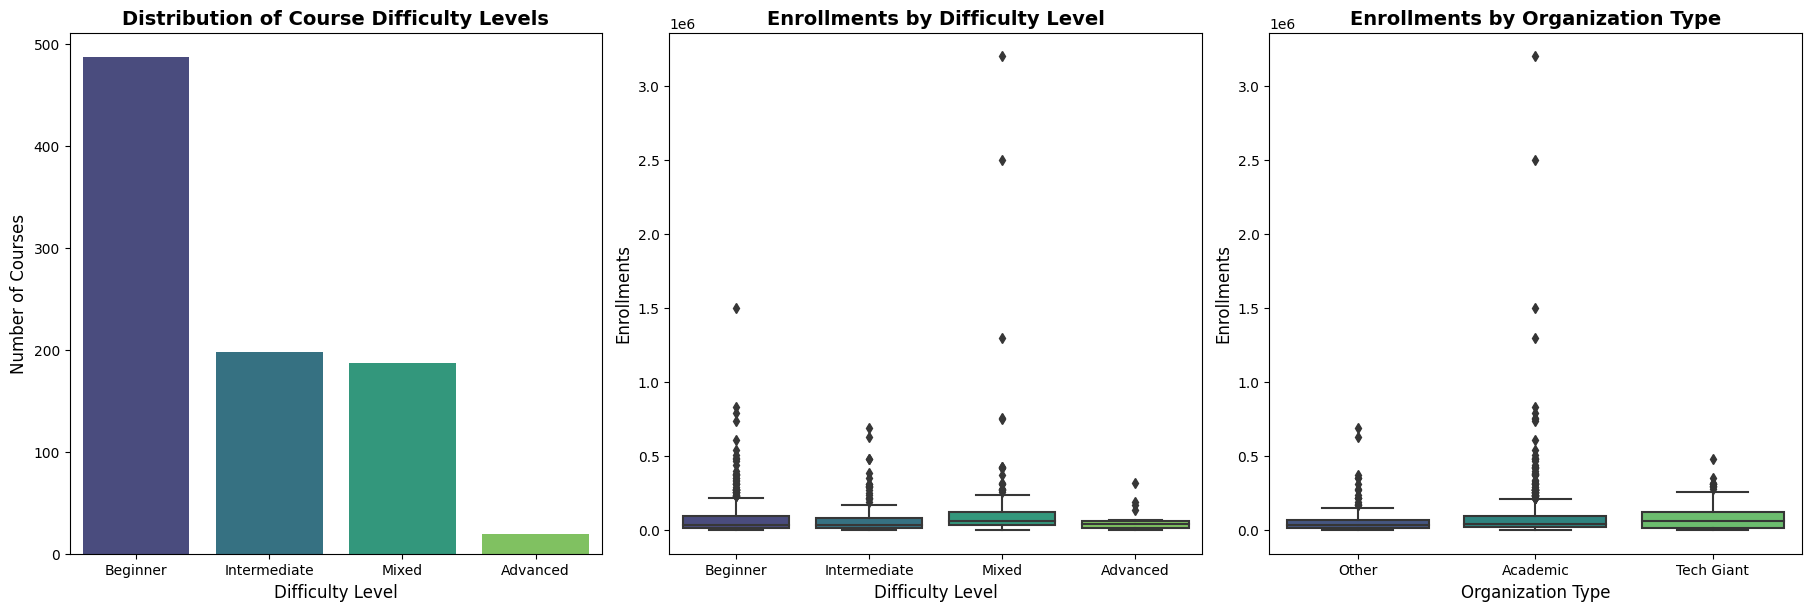

In [25]:
difficulty_count = data['difficulty'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

sns.barplot(x=difficulty_count.index, y=difficulty_count.values, palette="viridis", ax=axes[0])
axes[0].set_title("Distribution of Course Difficulty Levels", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Difficulty Level", fontsize=12)
axes[0].set_ylabel("Number of Courses", fontsize=12)

sns.boxplot(data=data, x='difficulty', y='students_enrolled', palette="viridis", ax=axes[1])
axes[1].set_title("Enrollments by Difficulty Level", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Difficulty Level", fontsize=12)
axes[1].set_ylabel("Enrollments", fontsize=12)

sns.boxplot(data=data, x='organization_type', y='students_enrolled', palette="viridis", ax=axes[2])
axes[2].set_title("Enrollments by Organization Type", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Organization Type", fontsize=12)
axes[2].set_ylabel("Enrollments", fontsize=12)

plt.show()

    

Here we see that the `Biginner` difficulty level has the most number of courses, while the `Advance` category has the least. the `Intermediate and Mixed` categories have almost the same amout of courses.

- Beginner-level courses have the largest median enrollment compared to other difficulty levels, indicating that they attract the most learners. This is expected as beginner courses are often entry points for many learners who are just starting out.

- Intermediate and Mixed-level courses show similar enrollment patterns with slightly lower medians compared to beginner courses. These courses cater to learners with some prior knowledge, thus appealing to a smaller but significant group.

- Advanced courses have the lowest median enrollment and the narrowest interquartile range, indicating that they attract fewer students. This suggests that only a small, specialized audience opts for advanced-level courses.

- All difficulty levels show extreme outliers, with some courses attracting enrollments in the millions. These outliers indicate specific highly popular courses, regardless of their difficulty level. Beginner-level courses seem to have the most prominent outliers. 
***

### 4. What is the distribution of course ratings, and which factors appear to correlate with higher ratings?

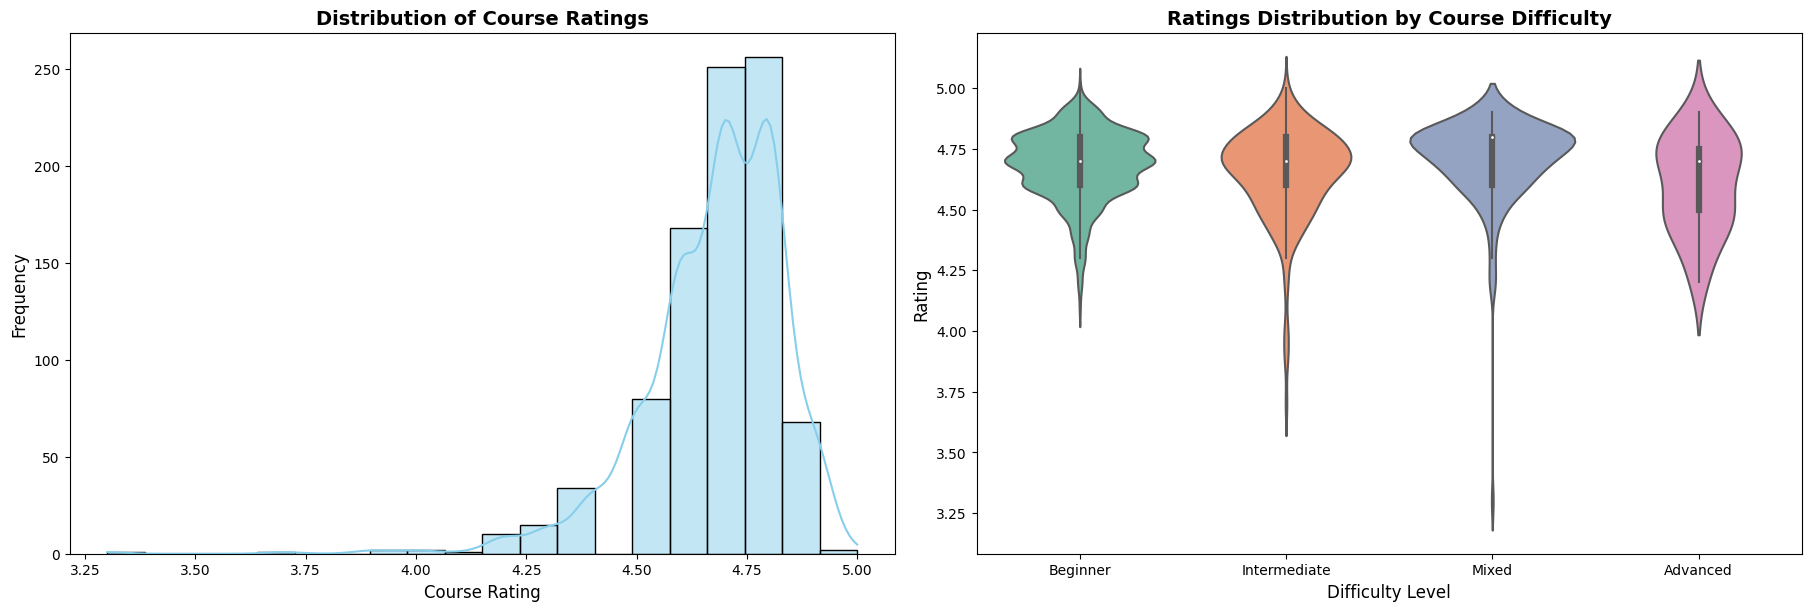

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

sns.histplot(data['rating'], kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title("Distribution of Course Ratings", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Course Rating", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

sns.violinplot(data=data, x='difficulty', y='rating', palette="Set2", ax=axes[1])
axes[1].set_title("Ratings Distribution by Course Difficulty", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Difficulty Level", fontsize=12)
axes[1].set_ylabel("Rating", fontsize=12)

plt.show()

The histogram shows that the distribution of course ratings is right-skewed, with the majority of ratings clustering in the range of 4.5 to 5. This indicates that most courses are highly rated.

- There are distinct peaks near 4.6 and 4.8, suggesting that these are common ratings, possibly reflecting consistently high-quality courses or user bias toward giving favorable reviews.

- Ratings below 4.0 are rare, indicating that poorly rated courses are either uncommon or less likely to remain on the platform.

- Despite the high concentration around 4.5 to 5.0, there is some variation, with ratings ranging as low as 3.3. However, these lower-rated courses represent a small fraction of the dataset.

The distribution for Beginner-level courses is tightly concentrated around a high median rating (approximately 4.7). This suggests that beginner-level courses are generally well-received, possibly due to their accessibility and simplicity in meeting learner expectations.

Intermediate courses exhibit a wider range of ratings, with some courses rated as low as 3.5. While the median remains high (approximately 4.7), this variability indicates mixed feedback. This may reflect diverse audience expectations or varying course quality within this category.

Courses labeled as Mixed difficulty have highest median rating (approximately 4.8) and the widest distribution, ranging from around 3.2 to 5. This could indicate that these courses attract learners with different skill levels, leading to varying experiences and ratings.

While Advanced courses also show high ratings (approximately 4.7), the median appears slightly lower than that of Beginner or Intermediate courses. The smaller but noticeable spread suggests that advanced courses may pose challenges for learners, which could impact feedback.

Courses with lower difficulty (Beginner) tend to have higher and more consistent ratings, while higher difficulty courses (Intermediate, Mixed) show greater variability and slightly lower ratings.

- Also, courses with difficulty level of `Mixed` have highest median rating of 4.8 compared to the `Intermediate`, `Advanced` and `Beginner` which all have a median rating of 4.7.
***
### 5. Are there patterns in the number of students enrolled per course, and how does this relate to ratings or certification types?

In [ ]:
fig = px.scatter(data, x='rating', y='students_enrolled',
                 color='certificate_type',
                 size='students_enrolled',
                 title='Enrollments vs Ratings by Certification Type',
                 labels={'rating': 'Rating', 'students_enrolled': 'Enrollments'},
                 hover_data=['title'],
                 width=1000)
fig.show()


Overall we see a positive correlation between `course_rating` and `course_students_enrolled`. Higher-rated courses (closer to 5 on the x-axis) tend to have more enrollments, as represented by larger bubble sizes and higher y-axis values.

- The largest bubbles in terms of enrollment size and ratings correspond to `COURSE` certification types. This suggests that `COURSE` programs tend to draw more students, possibly due to their comprehensive nature and perceived value.

A significant number of individual Courses with high ratings (closer to 5) show medium-to-high enrollments. This indicates that courses with better ratings may have broader appeal and attract more students.

- The Professional Certificate certification type occupies a relatively smaller share, with ratings clustered between 4.6 and 4.9 and enrollments appearing below moderate. These certificates might cater to a small niche audience.

As with most online courses, there is a visible trend where courses with higher ratings generally attract more enrollments. However, there are a few exceptions where courses with lower ratings still manage to have significant enrollments.

- A large proportion of certification types are clustered around ratings of 4.4 to 5, suggesting that most offerings are positively rated, regardless of certification type.

There are clear outliers (with enrollments exceeding 3 million), and most of these are associated with `COURSE`, suggesting that these programs have mass appeal.
***
### 6. Which topics or keywords in course titles are associated with the highest ratings or most enrollments?

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


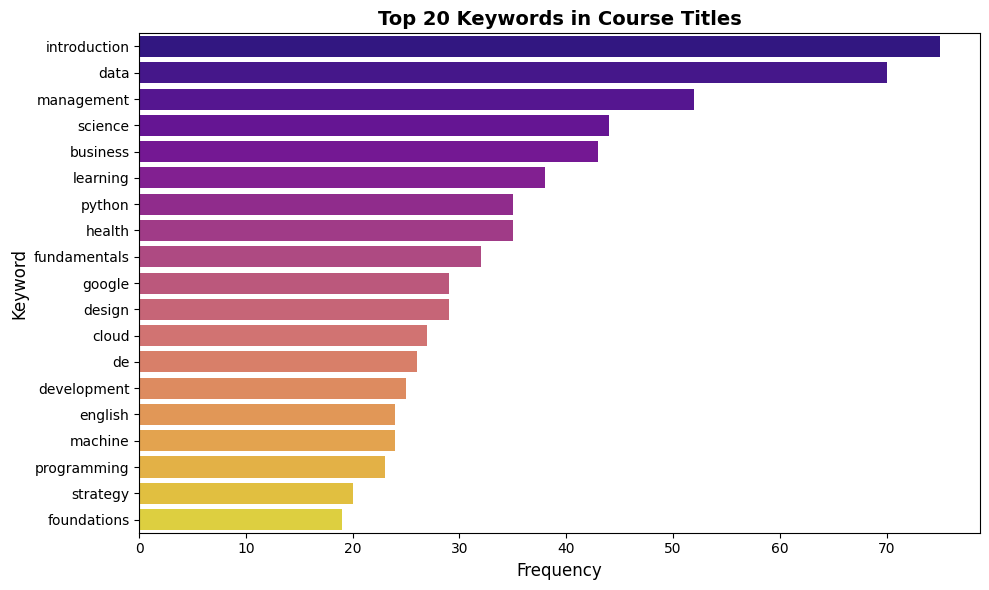

In [29]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
words = [word for title in data['title'] for word in title.lower().split() if word not in stop_words]
words = [re.sub(r'[^a-zA-Z\s]', '', word) for word in words]
word_counts = Counter(words).most_common(20)

word_data = pd.DataFrame(word_counts, columns=['Keyword', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=word_data[1:], palette="plasma")
plt.title("Top 20 Keywords in Course Titles", fontsize=14, fontweight='bold')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.tight_layout()
plt.show()


- `Introduction` is the most frequent keyword, indicating that introductory or beginner-level courses dominate. This could suggest that many learners are new to specific fields and prefer starting with foundational courses.

- Keywords like `data,` `management,` `science,` `business,` `learning,` and `python` highlight a strong interest in data-related fields, business skills, and technology.

- The prominence of keywords such as `data,` `python,` `machine,` `cloud,` and `development` suggests a high demand for courses related to programming, machine learning, cloud computing, and software development.

- Terms like `management,` `strategy,` and `fundamentals` show that learners are also interested in building general or business-related skills beyond technical expertise.

- The presence of keywords such as `health` and `design` indicates growing interest in healthcare-related fields and creative design disciplines.

***


## Conclusion

1. Beginner-level courses dominate in both quantity and enrollment, reflecting a strong demand for accessible entry-level content. Professional Certificate programs also attract significant enrollments, suggesting that career-oriented courses with tangible outcomes (certifications) are highly valued by learners.

2. Courses with higher ratings tend to attract more enrollments, highlighting the importance of course quality in driving engagement. This suggests that learners heavily rely on ratings as an indicator of course value.

3. Keywords like "data," "python," "machine learning," "management," and "strategy" are associated with the highest enrollments and ratings. This underscores a strong learner interest in technical and business-related skills for professional growth.

4. While multiple organizations provide high-quality courses, organizations with a strong brand, such as Stanford University, achieve higher enrollments. This indicates that learners often gravitate toward well-known providers when selecting courses.

## Improvements
1. With more data points and features we can do more in-dept analysis.

2. Conduct further analysis on courses with extremely high enrollments or ratings to identify specific factors driving their success, such as marketing strategies, content quality, or instructor reputation.

3. Investigate how ratings and enrollments evolve over time to identify trends and patterns, such as the effect of marketing campaigns or seasonal shifts in learning interests.

4. Analyze enrollments and ratings at a more granular level based on specific course topics or industries to identify niche areas with untapped potential for growth.

5. Incorporate learner reviews and feedback (if available) to better understand how qualitative factors, like course delivery or content clarity, influence ratings and enrollments.